# Project 2: Ames Housing Data and Kaggle Challenge

## Problem Statement

A business man is interested in doing a property investment in Ames Iowa. He wants to know what are some the the features needed inorder to fetch a high sales price.

Using the Ames housing dataset, we will be creating a model with features not more than 25 to help predict the house sale price so that he can get a higher return for his property investment.

*All libraries used*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error


current_palette = sns.color_palette()
sns.palplot(sns.color_palette("Paired"))
%matplotlib inline

## Data Import and Cleaning

In [2]:
#Reading the data
housing_df = pd.read_csv("../datasets/train.csv")

# replace spaces in column names and convert all columns to lowercase:
housing_df.columns = [x.lower().replace(' ','_') for x in housing_df.columns]
pd.options.display.max_columns = None

In [3]:
housing_df.head(10)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,45,528150070,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2188.0,Unf,0.0,142.0,2330.0,GasA,Ex,Y,SBrkr,2364,0,0,2364,1.0,0.0,2,1,2,1,Ex,11,Typ,2,Gd,Attchd,2009.0,Fin,3.0,820.0,TA,TA,Y,0,67,0,0,0,0,NaN,NaN,NaN,0,3,2010,New,611657
1,1638,527216080,20,RL,52.0,51974,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,PosN,Norm,1Fam,1Story,9,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,BrkFace,710.0,Ex,TA,PConc,Ex,TA,Av,GLQ,1101.0,Unf,0.0,1559.0,2660.0,GasA,Ex,Y,SBrkr,2338,0,0,2338,1.0,0.0,2,1,4,1,Gd,8,Typ,2,Gd,Attchd,2005.0,Fin,3.0,1110.0,Gd,TA,Y,0,135,0,0,322,0,NaN,NaN,NaN,0,6,2007,New,591587
2,2451,528360050,60,RL,114.0,17242,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,9,5,1993,1994,Hip,CompShg,MetalSd,MetalSd,BrkFace,738.0,Gd,Gd,PConc,Ex,TA,Gd,Rec,292.0,GLQ,1393.0,48.0,1733.0,GasA,Ex,Y,SBrkr,1933,1567,0,3500,1.0,0.0,3,1,4,1,Ex,11,Typ,1,TA,Attchd,1993.0,RFn,3.0,959.0,TA,TA,Y,870,86,0,0,210,0,NaN,NaN,NaN,0,5,2006,WD,584500
3,434,528110090,60,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,424.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0.0,Unf,0.0,1734.0,1734.0,GasA,Ex,Y,SBrkr,1734,1088,0,2822,0.0,0.0,3,1,4,1,Ex,12,Typ,1,Gd,BuiltIn,2009.0,RFn,3.0,1020.0,TA,TA,Y,52,170,0,0,192,0,NaN,NaN,NaN,0,1,2009,New,582933
4,2333,527212030,60,RL,85.0,16056,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,CemntBd,CmentBd,Stone,208.0,Gd,TA,PConc,Ex,TA,Av,GLQ,240.0,Unf,0.0,1752.0,1992.0,GasA,Ex,Y,SBrkr,1992,876,0,2868,0.0,0.0,3,1,4,1,Ex,11,Typ,1,Gd,BuiltIn,2005.0,Fin,3.0,716.0,TA,TA,Y,214,108,0,0,0,0,NaN,NaN,NaN,0,7,2006,New,556581
5,424,528106020,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1767.0,ALQ,539.0,788.0,3094.0,GasA,Ex,Y,SBrkr,2402,0,0,2402,1.0,0.0,2,0,2,1,Ex,10,Typ,2,Gd,Attchd,2008.0,Fin,3.0,672.0,TA,TA,Y,0,72,0,0,170,0,NaN,NaN,NaN,0,4,2009,WD,555000
6,457,528176030,20,RL,100.0,14836,Pave,NaN,IR1,HLS,AllPub,Inside,Mod,NridgHt,Norm,Norm,1Fam,1Story,10,5,2004,2005,Hip,CompShg,CemntBd,CmentBd,Stone,730.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2146.0,Unf,0.0,346.0,2492.0,GasA,Ex,Y,SBrkr,2492,0,0,2492,1.0,0.0,2,1,2,1,Ex,8,Typ,1,Ex,Attchd,2004.0,Fin,3.0,949.0,TA,TA,Y,226,235,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,552000
7,2331,527210040,60,RL,60.0,18062,Pave,NaN,IR1,HLS,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,2Story,10,5,2006,2006,Hip,CompShg,CemntBd,CmentBd,BrkFace,662.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0.0,Unf,0.0,1528.0,1528.0,GasA,Ex,Y,SBrkr,1528,1862,0,3390,0.0,0.0,3,1,5,1,Ex,10,Typ,1,Ex,BuiltIn,2006.0,Fin,3.0,758.0,TA,TA,Y,204,34,0,0,0,0,NaN,NaN,NaN,0,9,2006,New,545224
8,16,527216070,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,CulDSac,Mod,StoneBr,Norm,Norm,1Fam,2Story,8,5,2003,2003,Hip,CompShg,CemntBd,Wd Shng,BrkFace,603.0,Ex,TA,PConc,Gd,TA,Gd,ALQ,1416.0,Unf,0.0,234.0,1650.0,GasA,Ex,Y,SBrkr,1690,1589,0,3279,

In [4]:
#Checking the summary of the Dataframe
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
id                 2051 non-null int64
pid                2051 non-null int64
ms_subclass        2051 non-null int64
ms_zoning          2051 non-null object
lot_frontage       1721 non-null float64
lot_area           2051 non-null int64
street             2051 non-null object
alley              140 non-null object
lot_shape          2051 non-null object
land_contour       2051 non-null object
utilities          2051 non-null object
lot_config         2051 non-null object
land_slope         2051 non-null object
neighborhood       2051 non-null object
condition_1        2051 non-null object
condition_2        2051 non-null object
bldg_type          2051 non-null object
house_style        2051 non-null object
overall_qual       2051 non-null int64
overall_cond       2051 non-null int64
year_built         2051 non-null int64
year_remod/add     2051 non-null int64
roof_style         20

I will be dropping columns with >90% of nan. These columns are not useful as features selections since mostly are null values.

In [5]:
column_drop = []
for col in housing_df: 
    if ((housing_df[col].isnull().sum()/len(housing_df)*100).round(2)) > 90:
        column_drop.append(col)
        print("*************")
        print(col)
        print(str((housing_df[col].isnull().sum()/len(housing_df) *100).round(2)) + "%")
        #print(str((housing_df[col].isnull().sum()/housing_df.shape[0]*100).round(2)) + "%")

*************
alley
93.17%
*************
pool_qc
99.56%
*************
misc_feature
96.83%


In [6]:
column_drop

['alley', 'pool_qc', 'misc_feature']

In [7]:
#dropping columns with entries >90% empty,null,na
housing_df.drop(columns=column_drop, inplace = True)

In [10]:
housing_df.head(5)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,fence,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,45,528150070,20,RL,100.0,12919,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2188.0,Unf,0.0,142.0,2330.0,GasA,Ex,Y,SBrkr,2364,0,0,2364,1.0,0.0,2,1,2,1,Ex,11,Typ,2,Gd,Attchd,2009.0,Fin,3.0,820.0,TA,TA,Y,0,67,0,0,0,0,NaN,0,3,2010,New,611657
1,1638,527216080,20,RL,52.0,51974,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,PosN,Norm,1Fam,1Story,9,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,BrkFace,710.0,Ex,TA,PConc,Ex,TA,Av,GLQ,1101.0,Unf,0.0,1559.0,2660.0,GasA,Ex,Y,SBrkr,2338,0,0,2338,1.0,0.0,2,1,4,1,Gd,8,Typ,2,Gd,Attchd,2005.0,Fin,3.0,1110.0,Gd,TA,Y,0,135,0,0,322,0,NaN,0,6,2007,New,591587
2,2451,528360050,60,RL,114.0,17242,Pave,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,9,5,1993,1994,Hip,CompShg,MetalSd,MetalSd,BrkFace,738.0,Gd,Gd,PConc,Ex,TA,Gd,Rec,292.0,GLQ,1393.0,48.0,1733.0,GasA,Ex,Y,SBrkr,1933,1567,0,3500,1.0,0.0,3,1,4,1,Ex,11,Typ,1,TA,Attchd,1993.0,RFn,3.0,959.0,TA,TA,Y,870,86,0,0,210,0,NaN,0,5,2006,WD,584500
3,434,528110090,60,RL,107.0,13891,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,424.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0.0,Unf,0.0,1734.0,1734.0,GasA,Ex,Y,SBrkr,1734,1088,0,2822,0.0,0.0,3,1,4,1,Ex,12,Typ,1,Gd,BuiltIn,2009.0,RFn,3.0,1020.0,TA,TA,Y,52,170,0,0,192,0,NaN,0,1,2009,New,582933
4,2333,527212030,60,RL,85.0,16056,Pave,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,CemntBd,CmentBd,Stone,208.0,Gd,TA,PConc,Ex,TA,Av,GLQ,240.0,Unf,0.0,1752.0,1992.0,GasA,Ex,Y,SBrkr,1992,876,0,2868,0.0,0.0,3,1,4,1,Ex,11,Typ,1,Gd,BuiltIn,2005.0,Fin,3.0,716.0,TA,TA,Y,214,108,0,0,0,0,NaN,0,7,2006,New,556581


Columns such as "id" and "pid" will also be dropped as well since all are unique to each house.

In [8]:
housing_df.drop(columns=['id','pid'], inplace = True)

Columns with enough variances will be selected as features selections. Without enough variance, it is not very uselful in helping with the price predictions. Before doing any data cleaning, will be setting a benchmark of 80% as criteria to remove those numerical columns.

In [9]:
column_drop = []
for col in housing_df.columns:
    column_chk = (housing_df[col].value_counts() / len(housing_df) * 100)
    #print(column_chk)
    if (column_chk.index[0] == 0) & (column_chk.iloc[0] > 80):
        column_drop.append(col)

In [10]:
column_drop

['bsmtfin_sf_2',
 'low_qual_fin_sf',
 'bsmt_half_bath',
 'enclosed_porch',
 '3ssn_porch',
 'screen_porch',
 'pool_area',
 'misc_val']

In [11]:
#dropping columns with having zero > 80% .
housing_df.drop(columns=column_drop, inplace = True)

In [12]:
#Checking the accuracy of data
housing_df.describe().round(2)

,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,gr_liv_area,bsmt_full_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,mo_sold,yr_sold,saleprice
count,2051.00,1721.00,2051.00,2051.00,2051.00,2051.00,2051.00,2029.00,2050.00,2050.00,2050.00,2051.00,2051.00,2051.00,2049.00,2051.00,2051.00,2051.00,2051.00,2051.00,2051.00,1937.00,2050.00,2050.00,2051.00,2051.00,2051.00,2051.00,2051.00
mean,57.01,69.06,10065.21,6.11,5.56,1971.71,1984.19,99.70,442.30,567.73,1057.99,1164.49,329.33,1499.33,0.43,1.58,0.37,2.84,1.04,6.44,0.59,1978.71,1.78,473.67,93.83,47.56,6.22,2007.78,181469.70
std,42.82,23.26,6742.49,1.43,1.10,30.18,21.04,174.96,461.20,444.95,449.41,396.45,425.67,500.45,0.52,0.55,0.50,0.83,0.21,1.56,0.64,25.44,0.76,215.93,128.55,66.75,2.74,1.31,79258.66
min,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,0.00,334.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,1895.00,0.00,0.00,0.00,0.00,1.00,2006.00,12789.00
25%,20.00,58.00,7500.00,5.00,5.00,1953.50,1964.50,0.00,0.00,220.00,793.00,879.50,0.00,1129.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1961.00,1.00,319.00,0.00,0.00,4.00,2007.00,129825.00
50%,50.00,68.00,9430.00,6.00,5.00,1974.00,1993.00,0.00,368.00,474.50,994.50,1093.00,0.00,1444.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,1980.00,2.00,480.00,0.00,27.00,6.00,2008.00,162500.00
75%,70.00,80.00,11513.50,7.00,6.00,2001.00,2004.00,161.00,733.75,811.00,1318.75,1405.00,692.50,1728.50,1.00,2.00,1.00,3.00,1.00,7.00,1.00,2002.00,2.00,576.00,168.00,70.00,8.00,2009.00,214000.00
max,190.00,313.00,159000.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,2336.00,6110.00,5095.00,1862.00,5642.00,3.00,4.00,2.00,8.00,3.00,15.00,4.00,2207.00,5.00,1418.00,1424.00,547.00,12.00,2010.00,611657.00


In [13]:
#garage_yr_blt max value is 2207 ? 
housing_df[housing_df['garage_yr_blt'] == 2207 ]

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,gr_liv_area,bsmt_full_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,fence,mo_sold,yr_sold,sale_type,saleprice
262,20,RL,68.0,8298,Pave,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,Av,GLQ,583.0,Unf,963.0,1546.0,GasA,Ex,Y,SBrkr,1564,0,1564,0.0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2207.0,RFn,2.0,502.0,TA,TA,Y,132,0,NaN,9,2007,New,267300


In [14]:
#Change garage_yr_blt to 2006 based on year_built.
housing_df['garage_yr_blt'].replace(2207,2006, inplace = True)

###### Cleaning on columns related to basement

In [15]:
housing_df[housing_df['bsmt_qual'].isnull()][[col for col in housing_df.columns if 'bsmt' in col]]

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmt_unf_sf,total_bsmt_sf,bsmt_full_bath
206,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN
408,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
626,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
953,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
1220,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
1314,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
1335,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
1370,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
1455,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
1467,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0


In the bsmt_qual column, row that is filled with NAN refers to no basement.
Looking at all the basement related columns with NAN, categorical columns will be filled with "None" and numerical columns will be filled with 0

In [16]:
housing_df['bsmt_qual'].fillna('None', inplace=True)
housing_df['bsmt_cond'].fillna('None', inplace=True)
housing_df['bsmt_exposure'].fillna('None', inplace=True)
housing_df['bsmtfin_type_1'].fillna('None', inplace=True) 
housing_df['bsmtfin_sf_1'].fillna(0, inplace=True)
housing_df['bsmtfin_type_2'].fillna('None', inplace=True)
housing_df['bsmt_unf_sf'].fillna(0, inplace=True)  
housing_df['total_bsmt_sf'].fillna(0, inplace=True)
housing_df['bsmt_full_bath'].fillna(0, inplace=True)

###### Cleaning on columns related to garage

In [17]:
housing_df[housing_df['garage_type'].isnull()][[col for col in housing_df.columns if 'garage' in col]]

,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond
606,NaN,NaN,NaN,0.0,0.0,NaN,NaN
609,NaN,NaN,NaN,0.0,0.0,NaN,NaN
820,NaN,NaN,NaN,0.0,0.0,NaN,NaN
822,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1053,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1059,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1170,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1212,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1229,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1238,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In the garage_type column, row that is filled with NAN refers to no garage.
Again, looking at all the garage related columns with NAN, categorical columns will be filled with "None" and numerical columns will be filled with 0.

In [18]:
housing_df['garage_type'].fillna('None', inplace=True)
housing_df['garage_yr_blt'].fillna(0, inplace=True)
housing_df['garage_finish'].fillna('None', inplace=True)
housing_df['garage_cars'].fillna(0, inplace=True)
housing_df['garage_area'].fillna(0, inplace=True) 
housing_df['garage_qual'].fillna('None', inplace=True) 
housing_df['garage_cond'].fillna('None', inplace=True)   

###### Cleaning on columns related to masonary

In [19]:
housing_df[housing_df['mas_vnr_area'].isnull()][[col for col in housing_df.columns if 'mas_' in col]]

,mas_vnr_type,mas_vnr_area
18,NaN,NaN
90,NaN,NaN
101,NaN,NaN
150,NaN,NaN
262,NaN,NaN
296,NaN,NaN
338,NaN,NaN
378,NaN,NaN
384,NaN,NaN
438,NaN,NaN


In [20]:
housing_df['mas_vnr_type'].isnull().value_counts()

False    2029
True       22
Name: mas_vnr_type, dtype: int64

In [21]:
housing_df['mas_vnr_area'].isnull().value_counts()

False    2029
True       22
Name: mas_vnr_area, dtype: int64

Looking at the Masonry Veener related columns, there are only 22 rows with NaN value. Without losing any other data from other columns, will be filling in "None" for categorical columns and 0 for numerical columns.

In [22]:
housing_df['mas_vnr_type'].fillna('None', inplace=True)  
housing_df['mas_vnr_area'].fillna(0, inplace=True)

###### Cleaning on remaining columns

In [23]:
housing_df['fence'].isnull().value_counts()

True     1651
False     400
Name: fence, dtype: int64

NA in the 'fence' column refers to no fireplace. A total of 1651 houses without fence.

In [24]:
housing_df['fireplace_qu'].isnull().value_counts()

False    1051
True     1000
Name: fireplace_qu, dtype: int64

NA in the 'fireplace' column refers to no fireplace. A total of 1000 houses without fireplace.

Will be filling these two columns with 'None'.

In [25]:
housing_df['fireplace_qu'].fillna('None', inplace=True)                                                               
housing_df['fence'].fillna('None', inplace=True)

In [26]:
housing_df['lot_frontage'].isnull().value_counts()

False    1721
True      330
Name: lot_frontage, dtype: int64

There are 330 empty rows in the 'lot_frontage' column. Mean value usually can be affected by outliers. So will be filling with median value instead of mean value.

In [27]:
housing_df['lot_frontage'].fillna((housing_df['lot_frontage'].median()), inplace=True)

In [28]:
#Typo error in Exterior 2 column. Shld be CemntBd instead of CmentBd
housing_df['exterior_2nd'].replace('CmentBd','CemntBd', inplace = True)

In [29]:
housing_df.describe().round(2)

,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,gr_liv_area,bsmt_full_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,mo_sold,yr_sold,saleprice
count,2051.00,2051.00,2051.00,2051.00,2051.00,2051.00,2051.00,2051.00,2051.00,2051.00,2051.00,2051.00,2051.00,2051.00,2051.00,2051.00,2051.00,2051.00,2051.00,2051.00,2051.00,2051.00,2051.00,2051.00,2051.00,2051.00,2051.00,2051.00,2051.00
mean,57.01,68.89,10065.21,6.11,5.56,1971.71,1984.19,98.63,442.08,567.45,1057.47,1164.49,329.33,1499.33,0.43,1.58,0.37,2.84,1.04,6.44,0.59,1868.63,1.78,473.44,93.83,47.56,6.22,2007.78,181469.70
std,42.82,21.31,6742.49,1.43,1.10,30.18,21.04,174.32,461.20,445.02,449.91,396.45,425.67,500.45,0.52,0.55,0.50,0.83,0.21,1.56,0.64,454.08,0.77,216.14,128.55,66.75,2.74,1.31,79258.66
min,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,0.00,334.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,12789.00
25%,20.00,60.00,7500.00,5.00,5.00,1953.50,1964.50,0.00,0.00,220.00,793.00,879.50,0.00,1129.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1957.00,1.00,319.00,0.00,0.00,4.00,2007.00,129825.00
50%,50.00,68.00,9430.00,6.00,5.00,1974.00,1993.00,0.00,368.00,474.00,994.00,1093.00,0.00,1444.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,1978.00,2.00,480.00,0.00,27.00,6.00,2008.00,162500.00
75%,70.00,78.00,11513.50,7.00,6.00,2001.00,2004.00,159.00,733.50,811.00,1318.50,1405.00,692.50,1728.50,1.00,2.00,1.00,3.00,1.00,7.00,1.00,2001.00,2.00,576.00,168.00,70.00,8.00,2009.00,214000.00
max,190.00,313.00,159000.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,2336.00,6110.00,5095.00,1862.00,5642.00,3.00,4.00,2.00,8.00,3.00,15.00,4.00,2010.00,5.00,1418.00,1424.00,547.00,12.00,2010.00,611657.00


Updating on some of the data types columns to the correct types based on the data dictionary provided.

In [30]:
#Convert some data types
housing_df['ms_subclass'] = housing_df['ms_subclass'].astype(object)
housing_df['lot_frontage'] = housing_df['lot_frontage'].astype(int)
housing_df['overall_qual'] = housing_df['overall_qual'].astype(object)
housing_df['overall_cond'] = housing_df['overall_cond'].astype(object)
housing_df['mas_vnr_area'] = housing_df['mas_vnr_area'].astype(int)
housing_df['bsmtfin_sf_1'] = housing_df['bsmtfin_sf_1'].astype(int)
housing_df['bsmt_unf_sf'] = housing_df['bsmt_unf_sf'].astype(int)
housing_df['total_bsmt_sf'] = housing_df['total_bsmt_sf'].astype(int)
housing_df['bsmt_full_bath'] = housing_df['bsmt_full_bath'].astype(int)
housing_df['garage_yr_blt'] = housing_df['garage_yr_blt'].astype(int)
housing_df['garage_cars'] = housing_df['garage_cars'].astype(int)
housing_df['garage_area'] = housing_df['garage_area'].astype(int)

## Exploratory Data Analysis & Feature Engineering



Doing a heatmap to see which are some of the numerical features that has high correlations.

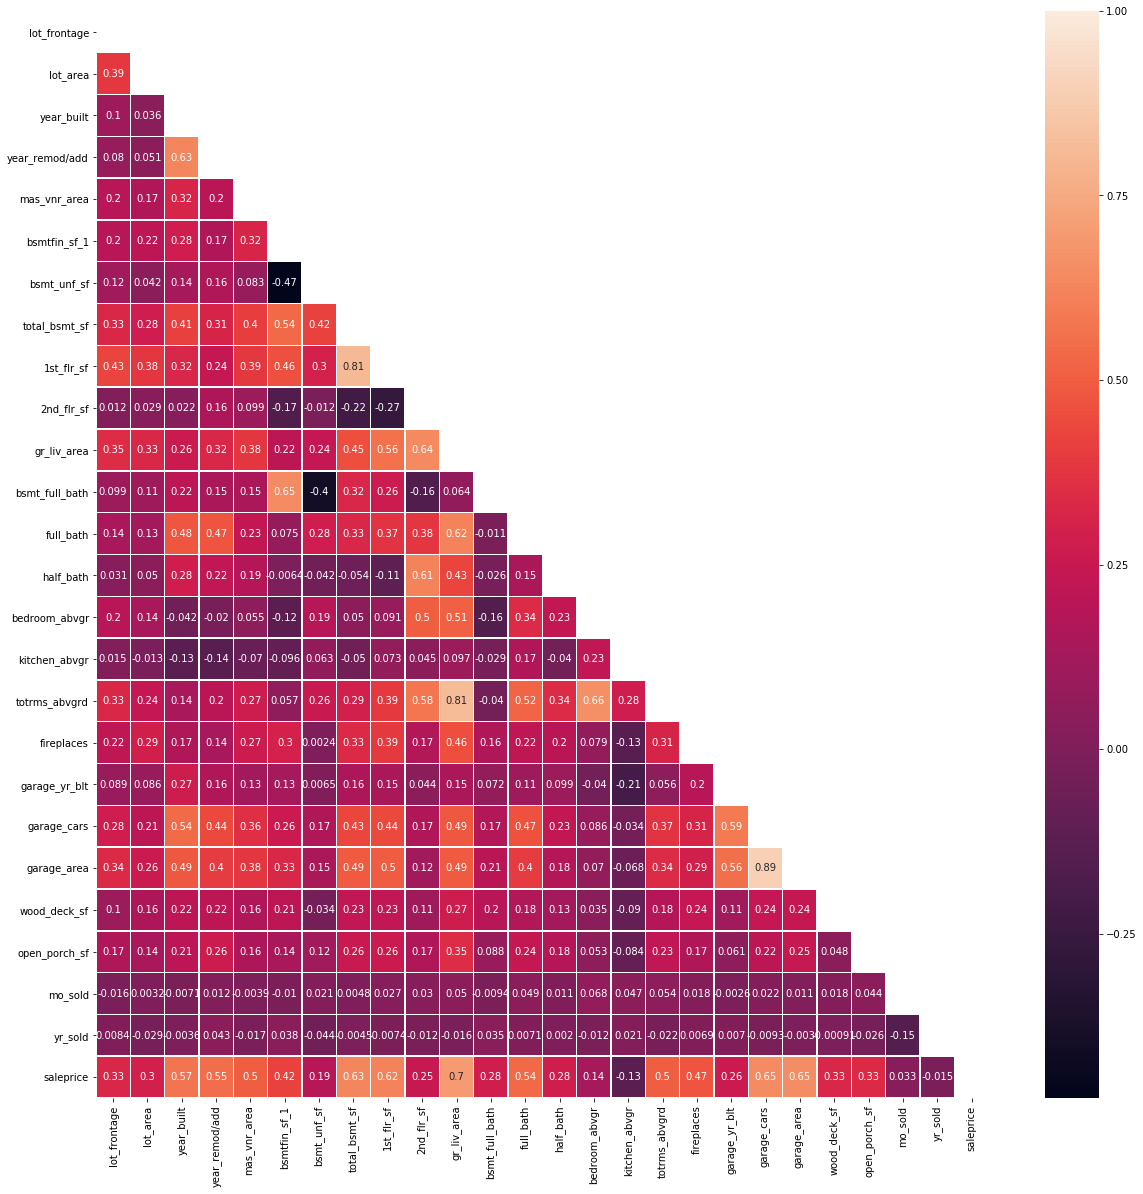

In [31]:
# Set the default matplotlib figure size to 20x20:
fix, ax = plt.subplots(figsize=(20,20))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(housing_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(housing_df.corr(), mask=mask, linewidths=0.5, annot=True)

Basesd on the heatmap above, we can see some high correlations between features such as 
- 'totrms_abvgrd' & 'gr_liv_area'
- 'garage_area' & 'garage_cars'

There is some Multicollinearity between variables,but regularization will helps to "subpress" it later.
Therefore, will select those features >0.5 and <-0.5 . Unwanted numerical features will be removed.

In [32]:
housing_df.corr()['saleprice'].sort_values()

kitchen_abvgr    -0.125444
yr_sold          -0.015203
mo_sold           0.032735
bedroom_abvgr     0.137067
bsmt_unf_sf       0.190861
2nd_flr_sf        0.248452
garage_yr_blt     0.258440
half_bath         0.283001
bsmt_full_bath    0.283332
lot_area          0.296566
lot_frontage      0.325129
wood_deck_sf      0.326490
open_porch_sf     0.333476
bsmtfin_sf_1      0.423856
fireplaces        0.471093
mas_vnr_area      0.503579
totrms_abvgrd     0.504014
full_bath         0.537969
year_remod/add    0.550370
year_built        0.571849
1st_flr_sf        0.618486
total_bsmt_sf     0.629303
garage_cars       0.647781
garage_area       0.649897
gr_liv_area       0.697038
saleprice         1.000000
Name: saleprice, dtype: float64

In [33]:
corr_df = housing_df.corr()['saleprice'].sort_values()

In [34]:
column_drop = []
column_corr = []
once = True
for i in range(len(corr_df)):
    if (((corr_df[i]) > 0.5 ) & (corr_df[i] < 1))| (((corr_df[i]) <- 0.5 ) & (corr_df[i] >-1)):
        column_corr.append(corr_df.index[i])
        if once is True:
            print("Benchmarking at features with stronger correlation >0.5 or <-0.5")
            print("*****************************************************************")
            once = False
        print(corr_df.index[i]) # printing out features with strong correlations
    elif (corr_df[i]) != 1:
        column_drop.append(corr_df.index[i])

Benchmarking at features with stronger correlation >0.5 or <-0.5
*****************************************************************
mas_vnr_area
totrms_abvgrd
full_bath
year_remod/add
year_built
1st_flr_sf
total_bsmt_sf
garage_cars
garage_area
gr_liv_area


In [35]:
column_drop

['kitchen_abvgr',
 'yr_sold',
 'mo_sold',
 'bedroom_abvgr',
 'bsmt_unf_sf',
 '2nd_flr_sf',
 'garage_yr_blt',
 'half_bath',
 'bsmt_full_bath',
 'lot_area',
 'lot_frontage',
 'wood_deck_sf',
 'open_porch_sf',
 'bsmtfin_sf_1',
 'fireplaces']

In [36]:
#Based on the correlation table, removing those unwanted columns.
housing_df.drop(columns=column_drop, inplace = True)

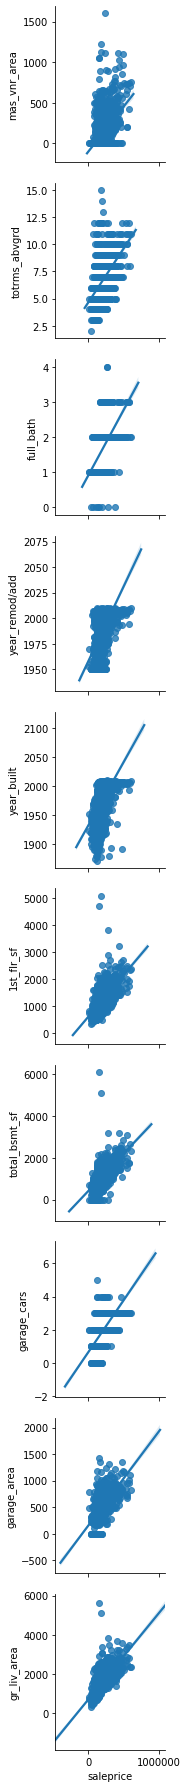

In [37]:
#Looking at the pairplot for the correlations between the saleprcie
sns.pairplot(housing_df, y_vars= column_corr, x_vars=['saleprice'], kind="reg")

From the pairplot as shown above, the 'gr_liv_area' is highly correlated with the sale price.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026D9C7716A0>,
      dtype=object)

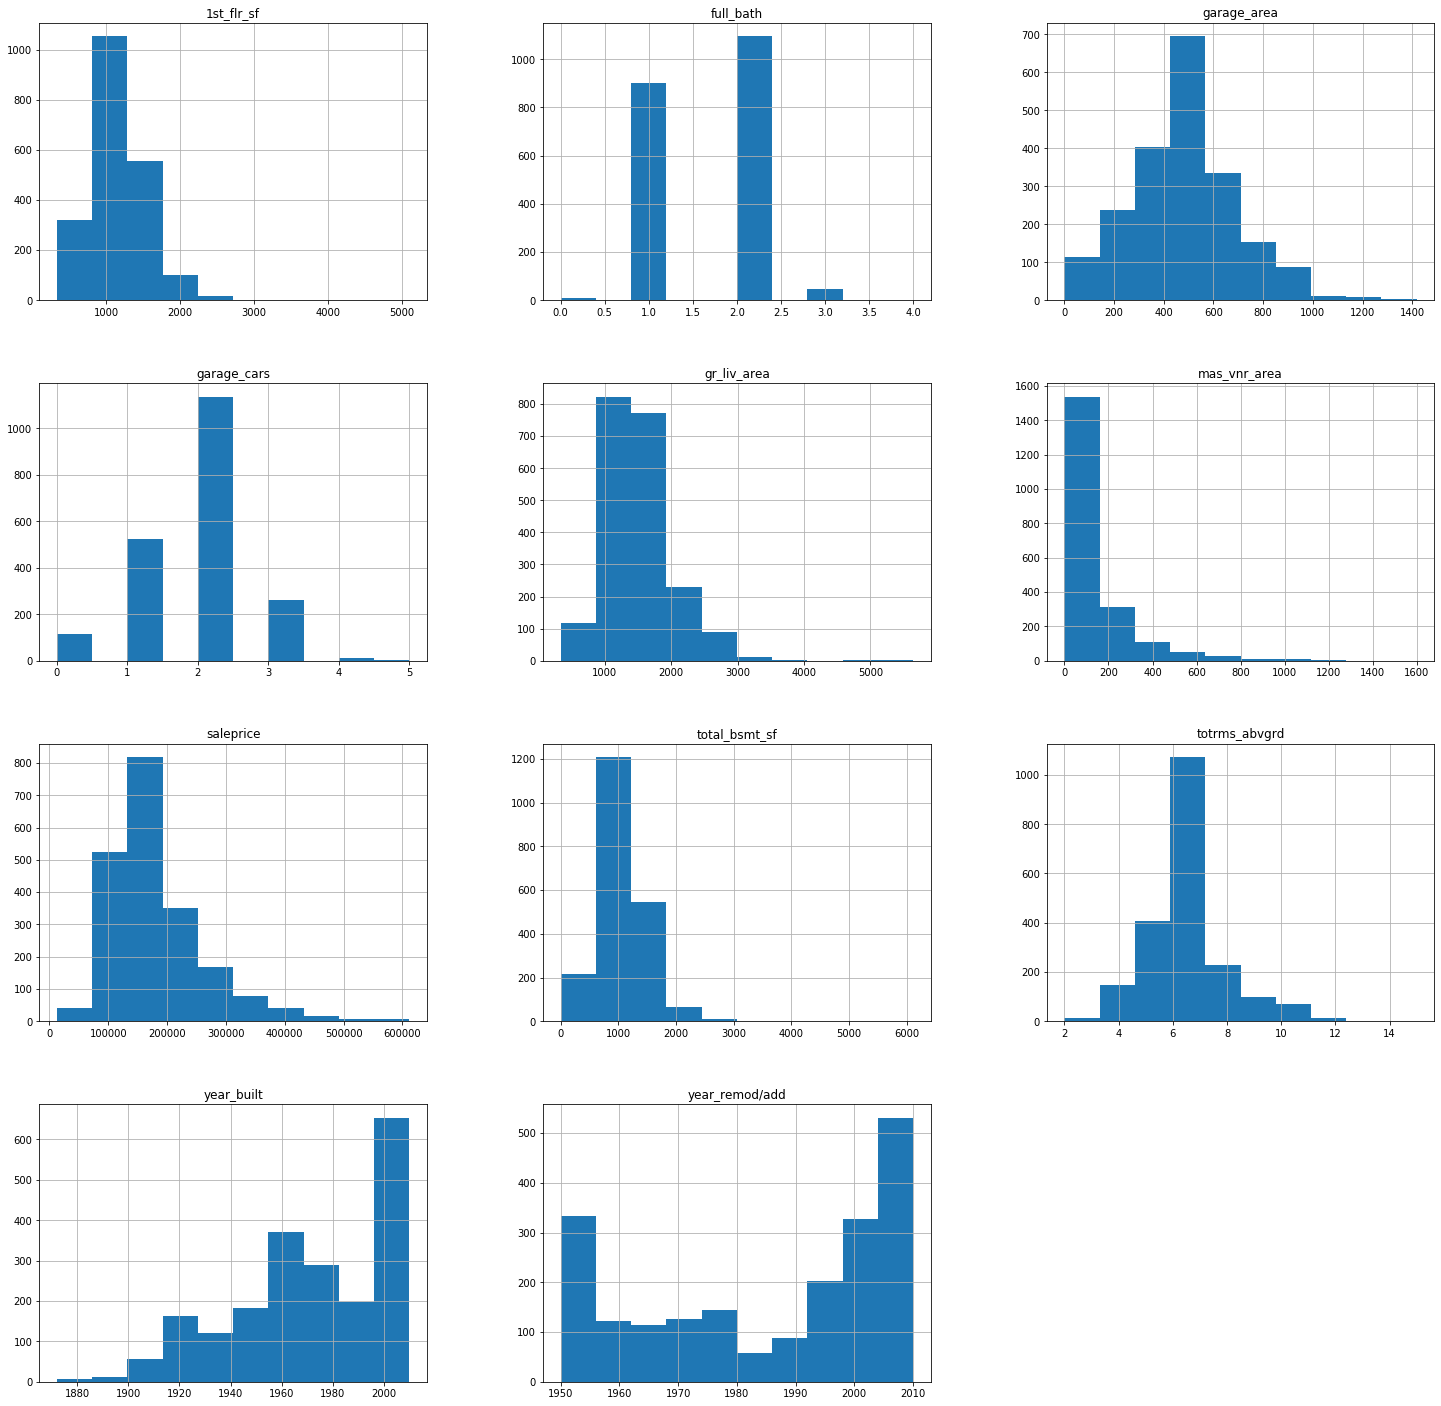

In [38]:
housing_df.hist(figsize=(25, 25))

Based on the histogram chart above, we can see 
- Most of the houses built were around after year 2000. 
- Most of the houses where being renovated in the year 2003-2010.
- Saleprice for the house mainly falls below <200K.

In [39]:
column_drop = []
for col in housing_df.columns:
    column_chk = (housing_df[col].value_counts() / len(housing_df) * 100)
    if column_chk.iloc[0] > 80:
        column_drop.append(col)

Features without much variance will be dropped since it is not useful in helping to predict the house price.
Will be setting at 80% as cut-off.

In [40]:
column_drop

['street',
 'land_contour',
 'utilities',
 'land_slope',
 'condition_1',
 'condition_2',
 'bldg_type',
 'roof_matl',
 'exter_cond',
 'bsmt_cond',
 'bsmtfin_type_2',
 'heating',
 'central_air',
 'electrical',
 'functional',
 'garage_qual',
 'garage_cond',
 'paved_drive',
 'fence',
 'sale_type']

In [41]:
#dropping columns having same data > 80%.
housing_df.drop(columns= column_drop, inplace = True)

In [42]:
#From the initial 81 columns down to 33 columns.
#Numerical columns
housing_df.head()

,ms_subclass,ms_zoning,lot_shape,lot_config,neighborhood,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,foundation,bsmt_qual,bsmt_exposure,bsmtfin_type_1,total_bsmt_sf,heating_qc,1st_flr_sf,gr_liv_area,full_bath,kitchen_qual,totrms_abvgrd,fireplace_qu,garage_type,garage_finish,garage_cars,garage_area,saleprice
0,20,RL,IR1,Inside,NridgHt,1Story,9,5,2009,2010,Hip,VinylSd,VinylSd,Stone,760,Ex,PConc,Ex,Gd,GLQ,2330,Ex,2364,2364,2,Ex,11,Gd,Attchd,Fin,3,820,611657
1,20,RL,IR1,CulDSac,StoneBr,1Story,9,5,2006,2007,Hip,VinylSd,VinylSd,BrkFace,710,Ex,PConc,Ex,Av,GLQ,2660,Ex,2338,2338,2,Gd,8,Gd,Attchd,Fin,3,1110,591587
2,60,RL,IR1,Inside,NoRidge,2Story,9,5,1993,1994,Hip,MetalSd,MetalSd,BrkFace,738,Gd,PConc,Ex,Gd,Rec,1733,Ex,1933,3500,3,Ex,11,TA,Attchd,RFn,3,959,584500
3,60,RL,Reg,Inside,NridgHt,2Story,9,5,2008,2009,Hip,VinylSd,VinylSd,Stone,424,Ex,PConc,Ex,Gd,Unf,1734,Ex,1734,2822,3,Ex,12,Gd,BuiltIn,RFn,3,1020,582933
4,60,RL,IR1,Inside,StoneBr,2Story,9,5,2005,2006,Hip,CemntBd,CemntBd,Stone,208,Gd,PConc,Ex,Av,GLQ,1992,Ex,1992,2868,3,Ex,11,Gd,BuiltIn,Fin,3,716,556581


Looking at the categorical features, we are going to do some feature enginnering.

Categorical features that cannot be easily re-group into new features will have the one-hot encoding (get dummies) done first.
Others that can be re-group will have the one-hot encoding done after new features are being created.
Objective of my goal is to reduce having too much one-hot encoding done on all categorical features which can lead to more than hundreds of features.

1) One hot-encoding done on features where cannot be re-group to create new features.

- 1a) ms_subclass

In [43]:
#Re-init. column_drop[] to hold new variables.
column_drop = []
#New dataframe for new dummies columns 
dummy=[]
column_dummy = pd.DataFrame(dummy)


In [44]:
#Add _dummies for ms_subclass
ms_subclass_dummy = pd.get_dummies(housing_df['ms_subclass'],prefix='mssub', drop_first=True)

column_drop.append('ms_subclass')
column_dummy = pd.concat([column_dummy, ms_subclass_dummy], axis=1)

- 1b) roof_style

In [45]:
#Add _dummies for roof_style
roof_style_dummy = pd.get_dummies(housing_df['roof_style'],prefix='rfstyle', drop_first=True)

column_drop.append('roof_style')
column_dummy = pd.concat([column_dummy, roof_style_dummy], axis=1)

- 1c) neighborhood

In [46]:
#Add _dummies for neighborhood
neighborhood_dummy = pd.get_dummies(housing_df['neighborhood'],prefix='neigh', drop_first=True)

column_drop.append('neighborhood')
column_dummy = pd.concat([column_dummy,neighborhood_dummy], axis=1)

- 1d) mas_vnr_type

In [47]:
#Add _dummies for mas_vnr_type
mas_vnr_type_dummy = pd.get_dummies(housing_df['mas_vnr_type'],prefix='mvtype',drop_first=True)

column_drop.append('mas_vnr_type')
column_dummy = pd.concat([column_dummy,mas_vnr_type_dummy], axis=1)

- 1e) foundation

In [48]:
#Add _dummies for foundation
foundation_dummy = pd.get_dummies(housing_df['foundation'],prefix='fnd', drop_first=True)

column_drop.append('foundation')
column_dummy = pd.concat([column_dummy,foundation_dummy], axis=1)

- 1f) garage_type

In [49]:
#Add _dummies for garage_type
garage_type_dummy = pd.get_dummies(housing_df['garage_type'],prefix='gartyp', drop_first=True)

column_drop.append('garage_type')
column_dummy = pd.concat([column_dummy,garage_type_dummy], axis=1)

2) One hot-encoding done after new feature is created based on the original feature.

- 2a) ms_zoning

Create new column to group into whether is it residential or not.

In [50]:
print(housing_df['ms_zoning'].value_counts())

RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: ms_zoning, dtype: int64


In [51]:
#Residential will include RH,RL,RP,RM,FV : Yes
#Non-Residential will include C(all),A(agr),I(all): No
residential_dummy = pd.get_dummies((housing_df['ms_zoning'].map(lambda x: 'Yes' if (x == 'RL' or x == 'RM' or x == 'RH' \
                                                                                    or x == 'FV') else 'No')),prefix='Res', drop_first=True)

column_drop.append('ms_zoning')
column_dummy = pd.concat([column_dummy,residential_dummy], axis=1)

print(residential_dummy.sum())
residential_dummy.head()

Res_Yes    2029
dtype: int64


,Res_Yes
0,1
1,1
2,1
3,1
4,1


- 2b) lot_shape

Create new column to group into whether lot shape is regular or irregular shape.

In [52]:
print(housing_df['lot_shape'].value_counts())

Reg    1295
IR1     692
IR2      55
IR3       9
Name: lot_shape, dtype: int64


In [53]:
#Regular lot shape will include Reg: Yes
#Irregular lot shape will include IR1, IR2, IR3: No
lotshape_dummy = pd.get_dummies((housing_df['lot_shape'].map(lambda x: 'Yes' if (x == 'Reg') else 'No')),prefix='shapereg', drop_first=True)

column_drop.append('lot_shape')
column_dummy = pd.concat([column_dummy,lotshape_dummy], axis=1)


print(lotshape_dummy.sum())
lotshape_dummy.head()

shapereg_Yes    1295
dtype: int64


,shapereg_Yes
0,0
1,0
2,0
3,1
4,0


- 2c) lot_config

Create new column to group into whether lot configuration is "Inside" type.

In [54]:
print(housing_df['lot_config'].value_counts())

Inside     1503
Corner      348
CulDSac     131
FR2          60
FR3           9
Name: lot_config, dtype: int64


In [55]:
#Inside will include Inside: Yes
#Non-Inside lot config will include Corner,CulDSac,FR2,FR3: No
lotconfig_dummy = pd.get_dummies((housing_df['lot_config'].map(lambda x: 'Yes' if (x == 'Inside') else 'No')),prefix='lotInside', drop_first=True)

column_drop.append('lot_config')
column_dummy = pd.concat([column_dummy,lotconfig_dummy], axis=1)

print(lotconfig_dummy.sum())
lotconfig_dummy.head()

lotInside_Yes    1503
dtype: int64


,lotInside_Yes
0,1
1,0
2,1
3,1
4,1


- 2d) house_style

Create new column to group into whether house is single story or not.

In [56]:
print(housing_df['house_style'].value_counts())

1Story    1059
2Story     598
1.5Fin     218
SLvl        94
SFoyer      50
2.5Unf      14
1.5Unf      12
2.5Fin       6
Name: house_style, dtype: int64


In [57]:
#Split Foyer & Split Level is group under non-1 story.
#1 story will include 1Story: Yes
#Non-1 story will include 2Story,1.5Fin,SLvl,SFoyer,2.5Unf,1.5Unf,2.5Fin: No
hselevel_dummy = pd.get_dummies((housing_df['house_style'].map(lambda x: 'Yes' if (x == '1Story') else 'No')),prefix='1story', drop_first=True)

column_drop.append('house_style')
column_dummy = pd.concat([column_dummy,hselevel_dummy], axis=1)

print(hselevel_dummy.sum())
hselevel_dummy.head()

1story_Yes    1059
dtype: int64


,1story_Yes
0,1
1,1
2,0
3,0
4,0


- 2e) overall_qual

Create new column to group into whether overall material and finishing is above average or not.

In [58]:
print(housing_df['overall_qual'].value_counts())

5     563
6     506
7     431
8     250
4     159
9      77
3      29
10     23
2       9
1       4
Name: overall_qual, dtype: int64


In [59]:
#AboveAvg will include 6, 7, 8, 9, 10 : abvavg
#Avg and below will include 1, 2, 3, 4, 5: below
overall_qual_dummy = pd.get_dummies((housing_df['overall_qual'].map(lambda x: 'abvavg' if (x == 6 or x == 7 or x ==8 or \
                                                                                           x == 9 or x == 10) else 'below')),prefix='overallqty', drop_first=True)
column_drop.append('overall_qual')
column_dummy = pd.concat([column_dummy,overall_qual_dummy], axis=1)

print(overall_qual_dummy.sum())
overall_qual_dummy.head()

overallqty_below    764
dtype: int64


,overallqty_below
0,0
1,0
2,0
3,0
4,0


- 2f) overall_cond

Create new column to group into whether overall house condition is above average or not 

In [60]:
print(housing_df['overall_cond'].value_counts())

5    1168
6     368
7     270
8     101
4      70
3      35
9      29
2       6
1       4
Name: overall_cond, dtype: int64


In [61]:
#AboveAvg will include 6, 7, 8, 9, 10 : abvavg
#Avg and below will include 1, 2, 3, 4, 5: below
overall_cond_dummy = pd.get_dummies((housing_df['overall_cond'].map(lambda x: 'abvavg' if (x == 6 or x == 7 or x ==8 or \
                                                                                           x == 9 or x == 10) else 'below')),prefix='overcond', drop_first=True)
column_drop.append('overall_cond')
column_dummy = pd.concat([column_dummy,overall_cond_dummy], axis=1)

print(overall_cond_dummy.sum())
overall_cond_dummy.head()

overcond_below    1283
dtype: int64


,overcond_below
0,1
1,1
2,1
3,1
4,1


- 2g) exterior_1st, exterior_2nd

Create new column to group into whether more than 1 materials are used for exterior.

In [62]:
#Ext. material more than 1 type: 1
#Ext. material only 1 type : 0

#iterate through each row and select 'exterior_1st' & 'exterior_2nd' column respectively.
housing_df['mat_more_than1'] = 0
           
for ind in housing_df.index:
    if (housing_df['exterior_1st'][ind]) == (housing_df['exterior_2nd'][ind]):
        housing_df['mat_more_than1'][ind] = 0
    else:
        housing_df['mat_more_than1'][ind] = 1


C:\Users\PQKoh\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\PQKoh\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [63]:
print(housing_df['mat_more_than1'].value_counts())

0    1822
1     229
Name: mat_more_than1, dtype: int64


In [64]:
mat_morethan1_dummy = pd.get_dummies(housing_df['mat_more_than1'],prefix='mat_morethan1', drop_first=True)

column_drop.append('exterior_1st')
column_drop.append('exterior_2nd')
column_drop.append('mat_more_than1')
column_dummy = pd.concat([column_dummy,mat_morethan1_dummy], axis=1)

print(mat_morethan1_dummy.sum())
mat_morethan1_dummy.head()

mat_morethan1_1    229
dtype: int64


,mat_morethan1_1
0,0
1,0
2,0
3,0
4,0


- 2h) exter_qual

Create new column to group into whether exterior is above average or not.

In [65]:
print(housing_df['exter_qual'].value_counts())

TA    1247
Gd     697
Ex      81
Fa      26
Name: exter_qual, dtype: int64


In [66]:
#Ext. quality above average will include Gd,Ex: abvavg
#Ext. quality average and below will include TA ,Fa : below
exter_qual_dummy = pd.get_dummies((housing_df['exter_qual'].map(lambda x:'abvavg'if (x == 'Gd' or x == 'Ex') else 'below')),prefix='extqual', drop_first=True)

column_drop.append('exter_qual')
column_dummy = pd.concat([column_dummy,exter_qual_dummy], axis=1)

print(exter_qual_dummy.sum())
exter_qual_dummy.head()

extqual_below    1273
dtype: int64


,extqual_below
0,0
1,0
2,0
3,0
4,0


- 2i) bsmt_qual

Create new column to group based on basement height.

In [67]:
print(housing_df['bsmt_qual'].value_counts())

TA      887
Gd      864
Ex      184
Fa       60
None     55
Po        1
Name: bsmt_qual, dtype: int64


In [68]:
#Basement height >= 80" will include TA,Gd,Ex: abv80inc
#Basement height < 80" will include Fa,Po,None : below80inc
bsmt_height_dummy = pd.get_dummies((housing_df['bsmt_qual'].map(lambda x:'abv80inc'if (x == 'TA' or x == 'Gd' or x == 'Ex') else 'below80inc')),prefix='bsmtheight', drop_first=True)

column_drop.append('bsmt_qual')
column_dummy = pd.concat([column_dummy,bsmt_height_dummy], axis=1)

print(bsmt_height_dummy.sum())
bsmt_height_dummy.head()

bsmtheight_below80inc    116
dtype: int64


,bsmtheight_below80inc
0,0
1,0
2,0
3,0
4,0


- 2j) bsmt_exposure

Create new column to group whether is there basement exposure.

In [69]:
print(housing_df['bsmt_exposure'].value_counts())

No      1339
Av       288
Gd       203
Mn       163
None      58
Name: bsmt_exposure, dtype: int64


In [70]:
#Basement exposure yes will include Av,Gd,Mn: Yes
#Basement exposure no will include No : No
bsmt_exposure_dummy = pd.get_dummies((housing_df['bsmt_exposure'].map(lambda x:'No'if (x == 'No') else 'Yes')),prefix='bsmtexp', drop_first=True)

column_drop.append('bsmt_exposure')
column_dummy = pd.concat([column_dummy,bsmt_exposure_dummy], axis=1)

print(bsmt_exposure_dummy.sum())
bsmt_exposure_dummy.head()

bsmtexp_Yes    712
dtype: int64


,bsmtexp_Yes
0,1
1,1
2,1
3,1
4,1


- 2k) bsmtfin_type_1

Create new column to group whether basement area is finished or not.

In [71]:
print(housing_df['bsmtfin_type_1'].value_counts())

GLQ     615
Unf     603
ALQ     293
BLQ     200
Rec     183
LwQ     102
None     55
Name: bsmtfin_type_1, dtype: int64


In [72]:
#Basement finished yes will include GLQ,ALQ,BLQ,Rec,LwQ: Yes
#Basement finished no will include Unf,None : No
bsmt_finish_dummy = pd.get_dummies((housing_df['bsmtfin_type_1'].map(lambda x:'No'if (x == 'Unf' or x == 'None') else 'Yes')),prefix='bsmtfin', drop_first=True)

column_drop.append('bsmtfin_type_1')
column_dummy = pd.concat([column_dummy,bsmt_finish_dummy], axis=1)

print(bsmt_finish_dummy.sum())
bsmt_finish_dummy.head()

bsmtfin_Yes    1393
dtype: int64


,bsmtfin_Yes
0,1
1,1
2,1
3,0
4,1


- 2l) heating_qc

Create new column to group whether heating_qc is above avg or not.

In [73]:
print(housing_df['heating_qc'].value_counts())

Ex    1065
TA     597
Gd     319
Fa      67
Po       3
Name: heating_qc, dtype: int64


In [74]:
#Heating qc above avg will include Ex,Gd: abvavg
#Heating qc average and below will include TA,Fa,Po : below
heatqc_dummy = pd.get_dummies((housing_df['heating_qc'].map(lambda x:'abvavg'if (x == 'Ex' or x == 'Gd') else 'below')),prefix='heatqc', drop_first=True)

column_drop.append('heating_qc')
column_dummy = pd.concat([column_dummy,heatqc_dummy], axis=1)

print(heatqc_dummy.sum())
heatqc_dummy.head()

heatqc_below    667
dtype: int64


,heatqc_below
0,0
1,0
2,0
3,0
4,0


- 2m) kitchen_qual

Create new column to group whether kitchen_qc is above avg or not.

In [75]:
print(housing_df['kitchen_qual'].value_counts())

TA    1047
Gd     806
Ex     151
Fa      47
Name: kitchen_qual, dtype: int64


In [76]:
#Kitchen qc above avg will include Ex,Gd: abvavg
#Kitchen qc average and below will include TA,Fa,Po : below
kitqc_dummy = pd.get_dummies((housing_df['kitchen_qual'].map(lambda x:'abvavg'if (x == 'Ex' or x == 'Gd') else 'below')),prefix='kitqc', drop_first=True)

column_drop.append('kitchen_qual')
column_dummy = pd.concat([column_dummy,kitqc_dummy], axis=1)

print(kitqc_dummy.sum())
kitqc_dummy.head()

kitqc_below    1094
dtype: int64


,kitqc_below
0,0
1,0
2,0
3,0
4,0


- 2n) fireplace_qu

Create new column to group whether there is fireplace or not.

In [77]:
print(housing_df['fireplace_qu'].value_counts())

None    1000
Gd       523
TA       407
Fa        59
Ex        31
Po        31
Name: fireplace_qu, dtype: int64


In [78]:
#Fireplace yes will include Gd,TA,Fa,Po,Ex : Yes
#Fireplace no will include None : No
fireplace_dummy = pd.get_dummies((housing_df['fireplace_qu'].map(lambda x:'No'if (x == 'None') else 'Yes')),prefix='firepl', drop_first=True)

column_drop.append('fireplace_qu')
column_dummy = pd.concat([column_dummy,fireplace_dummy], axis=1)

print(fireplace_dummy.sum())
fireplace_dummy.head()

firepl_Yes    1051
dtype: int64


,firepl_Yes
0,1
1,1
2,1
3,1
4,1


- 2o) garage_finish

Create new column to group whether garage Interior finished or not.

In [79]:
print(housing_df['garage_finish'].value_counts())

Unf     849
RFn     579
Fin     509
None    114
Name: garage_finish, dtype: int64


In [80]:
#Finished will include Fin, RFn : Finish
#Unfinished will include Unfinished and None : Unfinish
garage_fin_dummy = pd.get_dummies((housing_df['garage_finish'].map(lambda x: 'Finish' if (x == 'Fin' or x == 'RFn') else 'Unfinish')),prefix='garfin', drop_first=True)

column_drop.append('garage_finish')
column_dummy = pd.concat([column_dummy,garage_fin_dummy], axis=1)

print(garage_fin_dummy.sum())
garage_fin_dummy.head()

garfin_Unfinish    963
dtype: int64


,garfin_Unfinish
0,0
1,0
2,0
3,0
4,0


> <font size = 3 color = "crimson"> You need markdowns to separate all these. individual new features. </font>

In [81]:
column_drop

['ms_subclass',
 'roof_style',
 'neighborhood',
 'mas_vnr_type',
 'foundation',
 'garage_type',
 'ms_zoning',
 'lot_shape',
 'lot_config',
 'house_style',
 'overall_qual',
 'overall_cond',
 'exterior_1st',
 'exterior_2nd',
 'mat_more_than1',
 'exter_qual',
 'bsmt_qual',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'heating_qc',
 'kitchen_qual',
 'fireplace_qu',
 'garage_finish']

In [82]:
#Dropped those feature first that will be replaced with the newly created features later
housing_df.drop(columns= column_drop, inplace = True)

In [83]:
housing_df.head()

,year_built,year_remod/add,mas_vnr_area,total_bsmt_sf,1st_flr_sf,gr_liv_area,full_bath,totrms_abvgrd,garage_cars,garage_area,saleprice
0,2009,2010,760,2330,2364,2364,2,11,3,820,611657
1,2006,2007,710,2660,2338,2338,2,8,3,1110,591587
2,1993,1994,738,1733,1933,3500,3,11,3,959,584500
3,2008,2009,424,1734,1734,2822,3,12,3,1020,582933
4,2005,2006,208,1992,1992,2868,3,11,3,716,556581


In [84]:
#Create new dataframe for selected features, newly created features and dummy coded variable columns
new_housing_df = pd.concat([housing_df, column_dummy], axis=1)

In [85]:
new_housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 87 columns):
year_built               2051 non-null int64
year_remod/add           2051 non-null int64
mas_vnr_area             2051 non-null int32
total_bsmt_sf            2051 non-null int32
1st_flr_sf               2051 non-null int64
gr_liv_area              2051 non-null int64
full_bath                2051 non-null int64
totrms_abvgrd            2051 non-null int64
garage_cars              2051 non-null int32
garage_area              2051 non-null int32
saleprice                2051 non-null int64
mssub_30                 2051 non-null uint8
mssub_40                 2051 non-null uint8
mssub_45                 2051 non-null uint8
mssub_50                 2051 non-null uint8
mssub_60                 2051 non-null uint8
mssub_70                 2051 non-null uint8
mssub_75                 2051 non-null uint8
mssub_80                 2051 non-null uint8
mssub_85                 2051 non-null

#### Data dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**year_built**|*integer*|Train|Original construction date|
|**year_remod/add**|*integer*|Train|Remodel date (same as construction date if no remodeling or additions)|
|**mas_vnr_area**|*integer*|Train| Masonry veneer area in square feet|
|**total_bsmt_sf**|*integer*|Train|Total square feet of basement area|
|**1st_flr_sf**|*integer*|Train|First Floor square feet| 
|**gr_liv_area**|*integer*|Train|Above grade (ground) living area square feet|
|**full_bath**|*integer*|Train|Full bathrooms above grade|
|**totrms_abvgrd**|*integer*|Train|Total rooms above grade (does not include bathrooms)|
|**garage_cars**|*integer*|Train|Size of garage in car capacity|
|**garage_area**|*integer*|Train|Size of garage in square feet|
|**saleprice**|*integer*|Train|Sale price $$|
|**mssub_30**|*integer*|--|type of dwelling:1-STORY 1945 & OLDER (using one hot encoding)|
|**mssub_40**|*integer*|--|type of dwelling:1-STORY W/FINISHED ATTIC ALL AGES(using one hot encoding)|
|**mssub_45**|*integer*|--|type of dwelling:1-1/2 STORY - UNFINISHED ALL AGES (using one hot encoding)|
|**mssub_50**|*integer*|--|type of dwelling:1-1/2 STORY FINISHED ALL AGES (using one hot encoding)|
|**mssub_60**|*integer*|--|type of dwelling:2-STORY 1946 & NEWER (using one hot encoding)|
|**mssub_70**|*integer*|--|type of dwelling:2-STORY 1945 & OLDER (using one hot encoding)|
|**mssub_75**|*integer*|--|type of dwelling:2-1/2 STORY ALL AGES (using one hot encoding)|
|**mssub_80**|*integer*|--|type of dwelling:SPLIT OR MULTI-LEVEL (using one hot encoding)|
|**mssub_85**|*integer*|--|type of dwelling:SPLIT FOYER (using one hot encoding)|
|**mssub_90**|*integer*|--|type of dwelling:DUPLEX - ALL STYLES AND AGES (using one hot encoding)|
|**mssub_120**|*integer*|--|type of dwelling:1-STORY PUD (Planned Unit Development) - 1946 & NEWER (using one hot encoding)|
|**mssub_150**|*integer*|--|type of dwelling:1-1/2 STORY PUD - ALL AGES (using one hot encoding)|
|**mssub_160**|*integer*|--|type of dwelling:2-STORY PUD - 1946 & NEWER (using one hot encoding)|
|**mssub_180**|*integer*|--|type of dwelling:PUD - MULTILEVEL - INCL SPLIT LEV/FOYER (using one hot encoding)|
|**mssub_189**|*integer*|--|type of dwelling:2 FAMILY CONVERSION - ALL STYLES AND AGES (using one hot encoding)|
|**Res_Yes**|*integer*|--|Using train data set columns MS Zoning to create new column whether is it residential type(using one hot encoding)|
|**shapereg_Yes**|*integer*|--|Using train data set columns Lot Shape to create new column whether the shape of the lot is regular (using one hot encoding)|
|**lotInside_Yes**|*integer*|--||Using train data set columns Lot Config to create new column whether the lot configuration is "Inside" type (using one hot encoding)|
|**neigh_Blueste**|*integer*|--|Physical locations within Ames city limits:Bluestem(using one hot encoding) |
|**neigh_BrDale**|*integer*|--|Physical locations within Ames city limits:Briardale(using one hot encoding)|
|**neigh_BrkSide**|*integer*|--|Physical locations within Ames city limits:Brookside(using one hot encoding)|
|**neigh_ClearCr**|*integer*|--|Physical locations within Ames city limits:Clear Creek(using one hot encoding)|
|**neigh_CollgCr**|*integer*|--|Physical locations within Ames city limits:College Creek (using one hot encoding) |
|**neigh_Crawfor**|*integer*|--|Physical locations within Ames city limits:Crawford (using one hot encoding) |
|**neigh_Edwards**|*integer*|--|Physical locations within Ames city limits:Edwards (using one hot encoding) |
|**neigh_Gilbert**|*integer*|--|Physical locations within Ames city limits:Gilbert (using one hot encoding) |
|**neigh_Greens**|*integer*|--|Physical locations within Ames city limits:Greens (using one hot encoding) |
|**neigh_GrnHill**|*integer*|--|Physical locations within Ames city limits:Green Hills (using one hot encoding) |
|**neigh_IDOTRR**|*integer*|--|Physical locations within Ames city limits:Iowa DOT and Rail Road (using one hot encoding) |
|**neigh_Landmrk**|*integer*|--|Physical locations within Ames city limits:Landmark (using one hot encoding) |
|**neigh_Mitchel**|*integer*|--|Physical locations within Ames city limits:Mitchell (using one hot encoding) |
|**neigh_NAmes**|*integer*|--|Physical locations within Ames city limits:North Ames (using one hot encoding) |
|**neigh_NWAmes**|*integer*|--|Physical locations within Ames city limits:Northwest Ames (using one hot encoding) |
|**neigh_NoRidge**|*integer*|--|Physical locations within Ames city limits:Northridge (using one hot encoding) |
|**neigh_NridgHt**|*integer*|--|Physical locations within Ames city limits:Northridge Heights (using one hot encoding) |
|**neigh_OldTown**|*integer*|--|Physical locations within Ames city limits:Old Town (using one hot encoding) |
|**neigh_SWISU**|*integer*|--|Physical locations within Ames city limits:South & West of Iowa State University (using one hot encoding) |
|**neigh_Sawyer**|*integer*|--|Physical locations within Ames city limits:Sawyer (using one hot encoding) |
|**neigh_SawyerW**|*integer*|--|Physical locations within Ames city limits:Sawyer West (using one hot encoding) |
|**neigh_Somerst**|*integer*|--|Physical locations within Ames city limits:Somerset (using one hot encoding) |
|**neigh_StoneBr**|*integer*|--|Physical locations within Ames city limits:Stone Brook (using one hot encoding) |
|**neigh_Timber**|*integer*|--|Physical locations within Ames city limits:Timberland (using one hot encoding) |
|**neigh_Veenker**|*integer*|--|Physical locations within Ames city limits:Veenker (using one hot encoding) |
|**1story_Yes**|*integer*|--|Using train data set columns House Style to create new column whether is house is single story(using one hot encoding)|
|**overallqty_below**|*integer*|--|Using train data set columns Overall Qual to create new column whether overall material and finishing is above average(using one hot encoding)|
|**overcond_below**|*integer*|--|Using train data set columns Overall Qual to create new column whether overall house condition is above average(using one hot encoding)|
|**rfstyle_Gable**|*integer*|--|Type of roof:Gable (using one hot encoding)|
|**rfstyle_Gambrel**|*integer*|--|Type of roof:Gable (using one hot encoding)|
|**rfstyle_Hip**|*integer*|--|Type of roof:Hip (using one hot encoding)|
|**rfstyle_Mansard**|*integer*|--|Type of roof:Mansard (using one hot encoding)|
|**rfstyle_Shed**|*integer*|--|Type of roof:Shed (using one hot encoding)|
|**mat_morethan1_1**|*integer*|--|Using train data set columns Exterior 1 & Exterior 2  to create new column whether more than 1 materials are used for exterior(using one hot encoding)| 
|**mvtype_BrkFace**|*integer*|--|Mas Vnr Type:Brick Face (using one hot encoding)|
|**mvtype_None**|*integer*|--|Mas Vnr Type:Brick Face (using one hot encoding)|
|**mvtype_Stone**|*integer*|--|Mas Vnr Type:Stone (using one hot encoding)|
|**extqual_below**|*integer*|--|Using train data set columns Exter Qual to create new column whether exterior is above average(using one hot encoding)| 
|**fnd_CBlock**|*integer*|--|Type of foundation:Cinder Block (using one hot encoding)|
|**fnd_PConc**|*integer*|--|Type of foundation:fnd_PConc (using one hot encoding)|
|**fnd_Slab**|*integer*|--|Type of foundation:fnd_Slab (using one hot encoding)|
|**fnd_Stone**|*integer*|--|Type of foundation:Stone (using one hot encoding)|
|**fnd_Wood**|*integer*|--|Type of foundation:Wood (using one hot encoding)|
|**bsmtheight_below80inc**|*integer*|--|Using train data set columns Bsmt Qual  to create new column to group on basement height(using one hot encoding)|
|**bsmtexp_Yes**|*integer*|--|Using train data set columns Bsmt Exposure to create new column whether there is basement exposure(using one hot encoding)|
|**bsmtfin_Yes**|*integer*|--|Using train data set columns BsmtFin Type  to create new column whether basement area is finished(using one hot encoding)|
|**heatqc_below**|*integer*|--|Using train data set columns HeatingQC to create new column whether heating quality is above avg(using one hot encoding)|
|**kitqc_below**|*integer*|--|Using train data set columns KitchenQualC to create new column whether Kitchen quality is above avg(using one hot encoding)|
|**firepl_Yes**|*integer*|--|Using train data set columns FireplaceQu to create new column whether is there fireplace(using one hot encoding)|
|**gartyp_Attchd**|*integer*|--|Garage location:Attached to home(using one hot encoding)|
|**gartyp_Basment**|*integer*|--|Garage location:Basement Garage(using one hot encoding)|
|**gartyp_BuiltIn**|*integer*|--|Garage location:Built-In(using one hot encoding)|
|**gartyp_CarPort**|*integer*|--|Garage location:Car Port(using one hot encoding)|
|**gartyp_Detchd**|*integer*|--|Garage location:Detached from home(using one hot encoding)|
|**gartyp_None**|*integer*|--|Garage location:No Garage(using one hot encoding)|
|**garfin_Unfinish**|*integer*|--|Using train data set columns Garage Finish to create new column whether garage Interior finished or not(using one hot encoding)|

In [86]:
new_housing_df.head(2)

,year_built,year_remod/add,mas_vnr_area,total_bsmt_sf,1st_flr_sf,gr_liv_area,full_bath,totrms_abvgrd,garage_cars,garage_area,saleprice,mssub_30,mssub_40,mssub_45,mssub_50,mssub_60,mssub_70,mssub_75,mssub_80,mssub_85,mssub_90,mssub_120,mssub_150,mssub_160,mssub_180,mssub_190,rfstyle_Gable,rfstyle_Gambrel,rfstyle_Hip,rfstyle_Mansard,rfstyle_Shed,neigh_Blueste,neigh_BrDale,neigh_BrkSide,neigh_ClearCr,neigh_CollgCr,neigh_Crawfor,neigh_Edwards,neigh_Gilbert,neigh_Greens,neigh_GrnHill,neigh_IDOTRR,neigh_Landmrk,neigh_MeadowV,neigh_Mitchel,neigh_NAmes,neigh_NPkVill,neigh_NWAmes,neigh_NoRidge,neigh_NridgHt,neigh_OldTown,neigh_SWISU,neigh_Sawyer,neigh_SawyerW,neigh_Somerst,neigh_StoneBr,neigh_Timber,neigh_Veenker,mvtype_BrkFace,mvtype_None,mvtype_Stone,fnd_CBlock,fnd_PConc,fnd_Slab,fnd_Stone,fnd_Wood,gartyp_Attchd,gartyp_Basment,gartyp_BuiltIn,gartyp_CarPort,gartyp_Detchd,gartyp_None,Res_Yes,shapereg_Yes,lotInside_Yes,1story_Yes,overallqty_below,overcond_below,mat_morethan1_1,extqual_below,bsmtheight_below80inc,bsmtexp_Yes,bsmtfin_Yes,heatqc_below,kitqc_below,firepl_Yes,garfin_Unfinish
0,2009,2010,760,2330,2364,2364,2,11,3,820,611657,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,1,0,0,1,0
1,2006,2007,710,2660,2338,2338,2,8,3,1110,591587,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,0


In [87]:
#Saving new train.csv
new_housing_df.to_csv("../datasets/newtrain.csv")

### Create our feature matrix (`X`) and target vector (`y`)

In [88]:
#Saleprice is our target
target = 'saleprice'

#Select all the columns that are not the target
features = [col for col in new_housing_df.columns if col != target]

X = new_housing_df[features]
y = new_housing_df[target]

In [89]:
X.head()

,year_built,year_remod/add,mas_vnr_area,total_bsmt_sf,1st_flr_sf,gr_liv_area,full_bath,totrms_abvgrd,garage_cars,garage_area,mssub_30,mssub_40,mssub_45,mssub_50,mssub_60,mssub_70,mssub_75,mssub_80,mssub_85,mssub_90,mssub_120,mssub_150,mssub_160,mssub_180,mssub_190,rfstyle_Gable,rfstyle_Gambrel,rfstyle_Hip,rfstyle_Mansard,rfstyle_Shed,neigh_Blueste,neigh_BrDale,neigh_BrkSide,neigh_ClearCr,neigh_CollgCr,neigh_Crawfor,neigh_Edwards,neigh_Gilbert,neigh_Greens,neigh_GrnHill,neigh_IDOTRR,neigh_Landmrk,neigh_MeadowV,neigh_Mitchel,neigh_NAmes,neigh_NPkVill,neigh_NWAmes,neigh_NoRidge,neigh_NridgHt,neigh_OldTown,neigh_SWISU,neigh_Sawyer,neigh_SawyerW,neigh_Somerst,neigh_StoneBr,neigh_Timber,neigh_Veenker,mvtype_BrkFace,mvtype_None,mvtype_Stone,fnd_CBlock,fnd_PConc,fnd_Slab,fnd_Stone,fnd_Wood,gartyp_Attchd,gartyp_Basment,gartyp_BuiltIn,gartyp_CarPort,gartyp_Detchd,gartyp_None,Res_Yes,shapereg_Yes,lotInside_Yes,1story_Yes,overallqty_below,overcond_below,mat_morethan1_1,extqual_below,bsmtheight_below80inc,bsmtexp_Yes,bsmtfin_Yes,heatqc_below,kitqc_below,firepl_Yes,garfin_Unfinish
0,2009,2010,760,2330,2364,2364,2,11,3,820,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,1,0,0,1,0
1,2006,2007,710,2660,2338,2338,2,8,3,1110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,0
2,1993,1994,738,1733,1933,3500,3,11,3,959,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0
3,2008,2009,424,1734,1734,2822,3,12,3,1020,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0
4,2005,2006,208,1992,1992,2868,3,11,3,716,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0


## Modelling & Evaluating

### Model Prep: Train/test split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Model Prep: Scaling

In [91]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

C:\Users\PQKoh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\PQKoh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\PQKoh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


### Model Prep: Instantiate our models

In [92]:
lr = LinearRegression()

In [93]:
lasso = LassoCV(n_alphas=500)

In [94]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 200))

In [95]:
enet = ElasticNetCV(alphas=np.arange(0.5, 1.0, 0.005), l1_ratio=0.5)

### Cross validation

##### Evaluate four models.

In [96]:
#Linear Regression
lr_scores = cross_val_score(lr, X_train, y_train, cv=3)
lr_scores.mean()

print (lr_scores)
print (np.mean(lr_scores))

[-2.05202453e+24 -5.23371375e+24  8.33749004e-01]
-2.4285794281603326e+24


In [97]:
#Lasso
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=3)
lasso_scores.mean()

print (lasso_scores)
print (np.mean(lasso_scores))

C:\Users\PQKoh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2052: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\PQKoh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2052: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\PQKoh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2052: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.78270456 0.80388588 0.8359336 ]
0.8075080151284596


In [98]:
#Ridge
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=3)
ridge_scores.mean()

print (ridge_scores)
print (np.mean(ridge_scores))

[0.79622704 0.80207039 0.83487595]
0.8110577936312807


In [99]:
#Elastic Net
enet_scores = cross_val_score(enet, X_train, y_train, cv=3)
enet_scores.mean()

print (enet_scores)
print (np.mean(enet_scores))

C:\Users\PQKoh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2052: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\PQKoh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2052: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\PQKoh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2052: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.79829218 0.80430652 0.83298611]
0.8118616047217581


Among all the four model, Elastic Net performs the best. However, will be using Lasso as my modelling because it can help to do feature selection by elimination. 

Since will be using Lasso, instead of using the default cv = 3, will try cv =10 to see how it performs .

In [104]:
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=10)
lasso_scores.mean()

print (lasso_scores)
print (np.mean(lasso_scores))

C:\Users\PQKoh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\PQKoh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\PQKoh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\PQKoh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, Fut

[0.80731932 0.66181035 0.88552979 0.8148729  0.84417319 0.89023665
 0.68663189 0.88096413 0.83651976 0.83599092]
0.814404890147568


With a higher cv, it seems to perform better.

### Model Fitting and Evaluation

In [100]:
#Will be using Lasso to do the 25 features selections
lasso.fit(X_train, y_train)

C:\Users\PQKoh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2052: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=500, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

Lasso picked 75 variables and eliminated the other 11 variables


Text(0.5, 1.0, 'Coefficients in the Lasso Model')

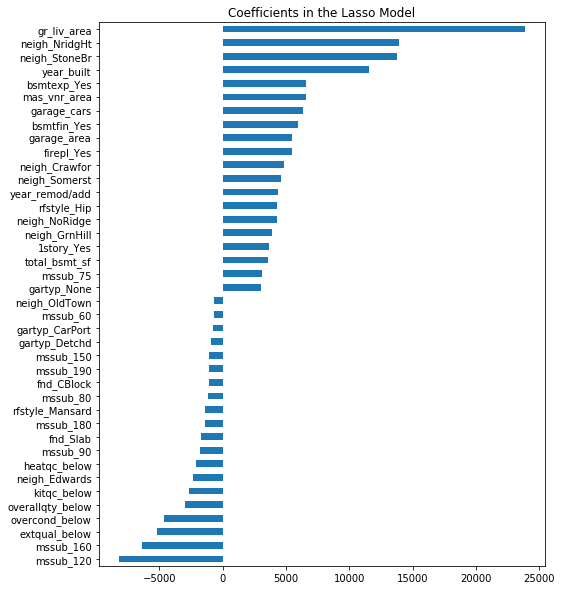

In [101]:
###Model Lasso regression
lasso_coefs = pd.Series(lasso.coef_, index = X.columns)
lasso_coefs.head()

print("Lasso picked " + str(sum(lasso_coefs != 0)) + " variables and eliminated the other " +  str(sum(lasso_coefs == 0)) + " variables")

imp_coef = pd.concat([lasso_coefs.sort_values().head(20),
                     lasso_coefs.sort_values().tail(20)])

plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [102]:
#Coefficients for variables in the Lasso
lasso_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})
lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

#Print the top 25features
lasso_coefs.head(25)

,variable,coef,abs_coef
5,gr_liv_area,23859.209038,23859.209038
48,neigh_NridgHt,13904.901859,13904.901859
54,neigh_StoneBr,13786.935128,13786.935128
0,year_built,11535.271044,11535.271044
20,mssub_120,-8182.039870,8182.039870
80,bsmtexp_Yes,6595.688997,6595.688997
2,mas_vnr_area,6578.847889,6578.847889
22,mssub_160,-6343.746402,6343.746402
8,garage_cars,6328.593116,6328.593116
81,bsmtfin_Yes,5954.045711,5954.045711


In [103]:
#Before reducing the features down to 25, determine R2.
lasso.score(X_train, y_train)

0.8468565212437753

In [104]:
pred = lasso.predict(X_test)
r2_score(y_test, pred)

0.8610616989209892

In [105]:
print("RMSE:" + str(np.sqrt(mean_squared_error(y_test, pred))))

RMSE:28375.68560569242


Re-eval. model with 25 selected features .
Using Lasso to help in Features selection, top 25 features with the highest abs coefficients will be used.

1)gr_liv_area, 2)neigh_StoneBr, 3)neigh_NridgHt, 4)year_built, 5)mssub_120, 6)bsmtexp_Yes, 7)mas_vnr_area, 8)mssub_160,       9)garage_cars, 10)bsmtfin_Yes, 11)garage_area, 12)firepl_Yes, 13)extqual_below, 14)overcond_below, 15)year_remod/add, 16)rfstyle_Hip, 17)neigh_Somerst, 18)1story_Yes, 19)neigh_GrnHill, 20)total_bsmt_sf, 21)neigh_Crawfor, 22)neigh_NoRidge,     23)mssub_75, 24)gartyp_None, 25)overallqty_below

In [106]:
#Select the 25 features 
features = ['gr_liv_area','neigh_StoneBr','neigh_NridgHt','year_built','mssub_120','bsmtexp_Yes','mas_vnr_area',\
            'mssub_160','garage_cars','bsmtfin_Yes','garage_area','firepl_Yes','extqual_below','overcond_below', \
            'year_remod/add','rfstyle_Hip','neigh_Somerst','1story_Yes','neigh_GrnHill','total_bsmt_sf','neigh_Crawfor',\
            'neigh_NoRidge','mssub_75','gartyp_None','overallqty_below']

X1 = new_housing_df[features]

In [107]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, random_state=42)

In [108]:
ss.fit(X1_train)
X1_train = ss.transform(X1_train)
X1_test = ss.transform(X1_test)

C:\Users\PQKoh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\PQKoh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  
C:\Users\PQKoh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [109]:
lasso.fit(X1_train, y_train)

C:\Users\PQKoh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2052: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=500, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [110]:
lasso.score(X1_train, y_train)

0.8343026375906558

In [111]:
pred = lasso.predict(X1_test)
r2_score(y_test, pred)

0.8498324817691496

In [112]:
print("RMSE:" + str(np.sqrt(mean_squared_error(y_test, pred))))

RMSE:29500.09219733928


There is a slight drop in performance when lesser features are used. (From 75 features  to 25 features).

## Business Recommendations
### Features that add the most value to a home would be the 
- Ground living area
- Location within the city - Northridge Heights, Stone Brook
- Year Built 

### Features that hurt the value of a home would be the 
- 1 or 2 storey Planned Unit Development
- Quality of the material on the house exterior that is average and below
- Overall condition of the house that is average and below 

## Conclusion:
With the set target of only using 25 features, there is some performance limitations. However, for future exploration, i should also apply domain knowledge to do features selection or feature engineering. Features like garage cars and garage area are correlated in one way or another. So i should be using only one instead of both. 